# Data 620 | Assignment 2.1 | Graph Visualization

This week's assignment is to: 

1- Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges. 
2- Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
3- Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information. 
4- Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.

Group members: Habib Khan, Vijaya Cherukuri, Priya Shaji, Abdellah Ait Elmouden

In [1]:
# Loading libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Vienna Subway Network

The dataset has been taken from https://www.kaggle.com/lenapiter/vienna-subway-network which contains information about the metro stations lines of Vienna, Austria. Data contains stations, lines and their color. We are interested to see how transportation via metro works in Vienna, Austria. 

In [2]:
def read(url):
    file = pd.read_csv(url, sep=';')
    file.head()
    return file

data = read('https://raw.githubusercontent.com/habibkhan89/Data620/master/Assignment%202/Part%201/vienna-subway_HK.csv')
data

,Start,Stop,Line,Color
0,Oberlaa,Neulaa,1,red
1,Neulaa,Alaudagasse,1,red
2,Alaudagasse,Altes Landgut,1,red
3,Altes Landgut,Troststrasse,1,red
4,Troststrasse,Reumannplatz,1,red
...,...,...,...,...
99,Spittelau,Jaegerstrasse,6,brown
100,Jaegerstrasse,Dresdner strasse,6,brown
101,Dresdner strasse,Handelskai,6,brown
102,Handelskai,Neue Donau,6,brown


In [3]:
# Reading edgelists from the data
vienna = nx.from_pandas_edgelist(data, source="Start", target="Stop", edge_attr=True)
print(type(vienna))

<class 'networkx.classes.graph.Graph'>


In [4]:
# Printing info
print(nx.info(vienna))

Name: 
Type: Graph
Number of nodes: 98
Number of edges: 104
Average degree:   2.1224


In [83]:
# How many metro stations are there in Vienna?
print(vienna.number_of_nodes())
vienna.nodes()

98


NodeView(('Oberlaa', 'Neulaa', 'Alaudagasse', 'Altes Landgut', 'Troststrasse', 'Reumannplatz', 'Keplerplatz', 'Suedtiroler Platz - Hauptbahnhof', 'Taubstummengasse', 'Karlsplatz', 'Stephansplatz', 'Schwedenplatz', 'Nestroyplatz', 'Praterstern', 'Vorgartenstrasse', 'Donauinsel', 'Kaisermuehlen/VIC', 'Alte Donau', 'Kagran', 'Kagraner Platz', 'Rennbahnweg', 'Aderklaaer strasse', 'Grossfeldsiedlung', 'Leopoldau', 'Seestadt', 'Aspern Nord', 'Hausfeldstrasse', 'Aspernstrasse', 'Donauspital', 'Hardeggasse', 'Stadlau', 'Donaustadtbruecke', 'Donaumarina', 'Stadion', 'Krieau', 'Messe-Prater', 'Taborstrasse', 'Schottenring', 'Schottentor', 'Rathaus', 'Volkstheater', 'Museumsquartier', 'Ottakring', 'Kendlerstrasse', 'Huetteldorfer strasse', 'Johnstrasse', 'Schweglerstrasse', 'Westbahnhof', 'Zieglergasse', 'Neubaugasse', 'Herrengasse', 'Stubentor', 'Landstrasse', 'Rochusgasse', 'Kardinal-Nagl-Platz', 'Schlachthausgasse', 'Erdberg', 'Gasometer', 'Zippererstrasse', 'Enkplatz', 'Simmering', 'Huetteldo

There are 98 metro stations in Vienna, Austria which are connected through following edges.

In [27]:
# How all vienna stations are connected to each other?
print(vienna.number_of_edges())
vienna.edges()

104


EdgeView([('Oberlaa', 'Neulaa'), ('Neulaa', 'Alaudagasse'), ('Alaudagasse', 'Altes Landgut'), ('Altes Landgut', 'Troststrasse'), ('Troststrasse', 'Reumannplatz'), ('Reumannplatz', 'Keplerplatz'), ('Keplerplatz', 'Suedtiroler Platz - Hauptbahnhof'), ('Suedtiroler Platz - Hauptbahnhof', 'Taubstummengasse'), ('Taubstummengasse', 'Karlsplatz'), ('Karlsplatz', 'Stephansplatz'), ('Karlsplatz', 'Museumsquartier'), ('Karlsplatz', 'Kettenbrueckengasse'), ('Karlsplatz', 'Stadtpark'), ('Stephansplatz', 'Schwedenplatz'), ('Stephansplatz', 'Herrengasse'), ('Stephansplatz', 'Stubentor'), ('Schwedenplatz', 'Nestroyplatz'), ('Schwedenplatz', 'Landstrasse'), ('Schwedenplatz', 'Schottenring'), ('Nestroyplatz', 'Praterstern'), ('Praterstern', 'Vorgartenstrasse'), ('Praterstern', 'Messe-Prater'), ('Praterstern', 'Taborstrasse'), ('Vorgartenstrasse', 'Donauinsel'), ('Donauinsel', 'Kaisermuehlen/VIC'), ('Kaisermuehlen/VIC', 'Alte Donau'), ('Alte Donau', 'Kagran'), ('Kagran', 'Kagraner Platz'), ('Kagraner Pl

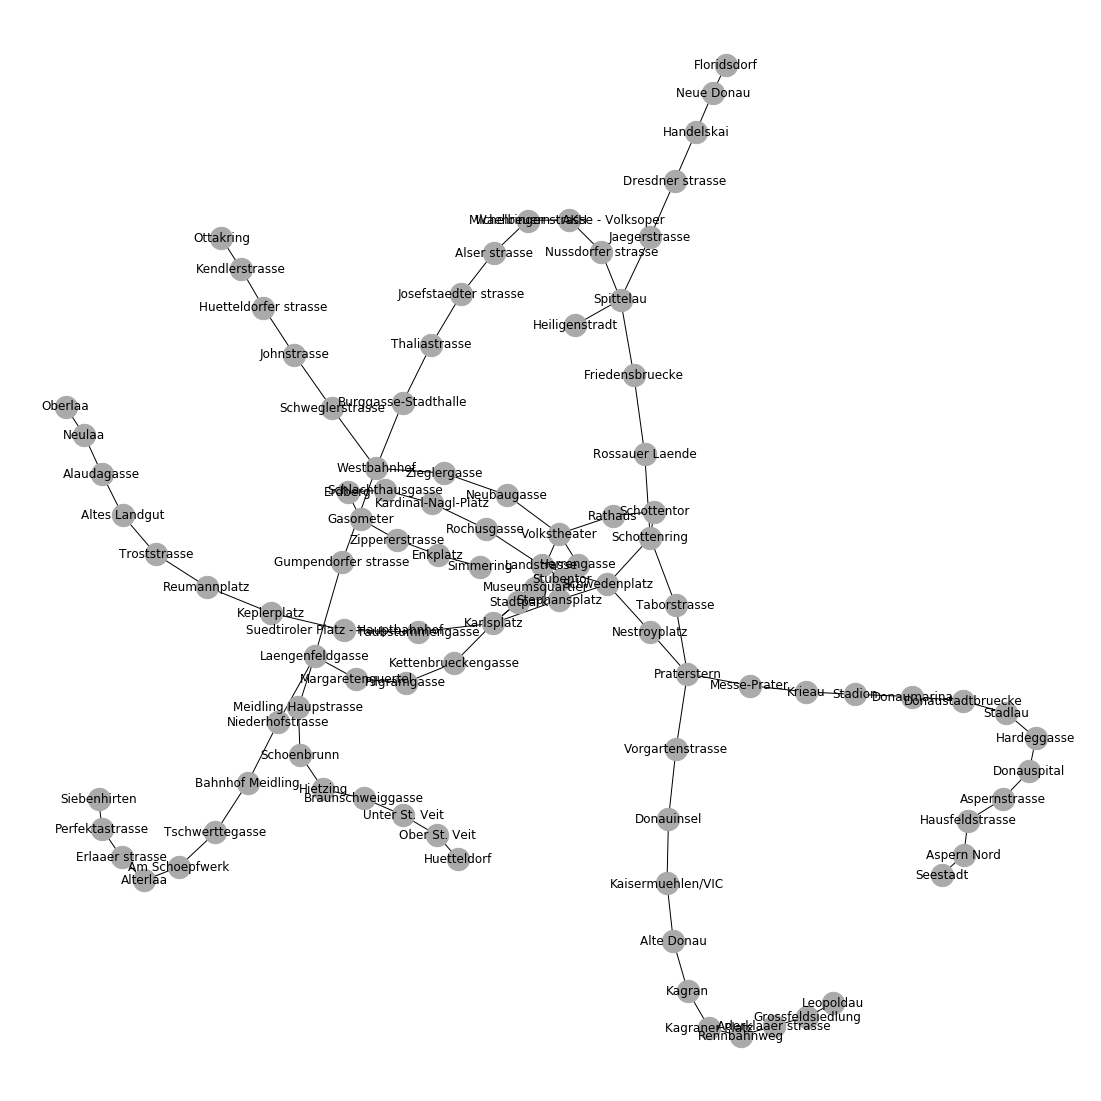

In [73]:
# Creating basic network graph

plt.figure(figsize=(15,15))
nx.draw(vienna, with_labels=True, node_color="#AAAAAA", node_size=500)

In [97]:
# Calculating the diameter, min and max
print("The diameter of the graph is ", nx.diameter(vienna))

The diameter of the graph is  28


In [103]:
# Calculating shortest distance from Johnstrasse to Taborstrasse
vienna_s = nx.shortest_path(vienna, "Johnstrasse", "Taborstrasse")
vienna_s

['Johnstrasse',
 'Schweglerstrasse',
 'Westbahnhof',
 'Zieglergasse',
 'Neubaugasse',
 'Volkstheater',
 'Rathaus',
 'Schottentor',
 'Schottenring',
 'Taborstrasse']

In [5]:
# Saving graphml file
nx.write_graphml(vienna, 'vienna.graphml')